In [49]:
# Load the dataset, get the desired values only.
# Make the points into categorical data
# USe smoot
# train 
# evaluate.

# 'protocol'
# 'flow_duration'
# 'tot_fwd_pkts'
# 'tot_bwd_pkts'
# 'totlen_fwd_pkts'
# 'totlen_bwd_pkts'
# 'fwd_pkt_len_mean'
# 'fwd_pkt_len_std'
# 'bwd_pkt_len_mean'
# 'flow_byts_s'
# 'flow_pkts_s'
# 'flow_iat_std'
# 'flow_iat_min'
# 'fwd_iat_tot'
# 'fwd_iat_min'
# 'bwd_iat_tot'
# 'bwd_iat_min'
# 'fwd_psh_flags'
# 'fwd_urg_flags'
# 'bwd_pkts_s'
# 'fin_flag_cnt'
# 'rst_flag_cnt'
# 'psh_flag_cnt'
# 'ack_flag_cnt'
# 'urg_flag_cnt'
# 'down_up_ratio'
# 'init_fwd_win_byts'
# 'init_bwd_win_byts'
# 'fwd_seg_size_min'
# 'active_mean'
# 'idle_mean'


# label

In [50]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
data = pd.read_csv('infiltration_01-03-2018.csv')
data.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348.0,0.0,1812348,1812348,56700000.0,6.010058e+06,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939.0,0.0,3530939,3530939,19200000.0,1.250000e+07,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909.0,0.0,999909,999909,61000000.0,0.000000e+00,61000000,61000000,Benign


In [52]:
data['label'].value_counts()

label
Benign           238037
Infilteration     93063
Name: count, dtype: int64

In [53]:
cols = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean',
'label'
]

In [54]:
df_new = data[cols]
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,0,115307855,5,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,1812348.0,56700000.0,Benign
1,0,60997457,2,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,61000000.0,Benign
2,17,61149019,5,0,1500,0,300.0,0.000000,0.000000,24.530238,...,0,0,0,0,-1,-1,8,3530939.0,19200000.0,Benign
3,0,60997555,2,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,61000000.0,Benign
4,0,61997503,3,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,999909.0,61000000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331095,0,118494070,31,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,0.0,Benign
331096,6,114340,2,1,0,0,0.0,0.000000,0.000000,0.000000,...,1,0,0,0,1024,0,20,0.0,0.0,Benign
331097,6,1404866,8,7,1132,1581,141.5,222.792023,225.857143,1931.145034,...,1,0,0,0,8192,62868,20,0.0,0.0,Benign
331098,6,3966663,14,7,1386,392,99.0,189.204814,56.000000,448.235708,...,1,0,0,0,8192,62652,20,0.0,0.0,Benign


In [55]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [56]:
df_new['protocol'] = LE.fit_transform(df_new['protocol'])
df_new['label'] = LE.fit_transform(df_new['label'])

/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47556/3086081652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['protocol'] = LE.fit_transform(df_new['protocol'])
/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47556/3086081652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label'] = LE.fit_transform(df_new['label'])


In [57]:
df_new['protocol'].value_counts()

protocol
1    212899
2    111052
0      7149
Name: count, dtype: int64

In [58]:
threshold = pd.to_numeric(np.finfo(np.float64).max)

# Remove rows with any value greater than float64
df_new = df_new[(df_new <= threshold).all(axis=1)]

print("DataFrame after removing rows with any value greater than float64:")
print(df_new)

DataFrame after removing rows with any value greater than float64:
        protocol  flow_duration  tot_fwd_pkts  tot_bwd_pkts  totlen_fwd_pkts  \
0              0      115307855             5             0                0   
1              0       60997457             2             0                0   
2              2       61149019             5             0             1500   
3              0       60997555             2             0                0   
4              0       61997503             3             0                0   
...          ...            ...           ...           ...              ...   
331095         0      118494070            31             0                0   
331096         1         114340             2             1                0   
331097         1        1404866             8             7             1132   
331098         1        3966663            14             7             1386   
331099         1       86637706             2        

In [59]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


In [60]:
df_new = df_new.dropna()

In [61]:
columns_with_na = df_new.columns[df_new.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: []


/var/folders/ld/bwffsrf52mnfq4_gy_k9p9480000gn/T/ipykernel_47556/2687928747.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_new['label']).plot.bar()


label
0    235778
1     92403
Name: count, dtype: int64

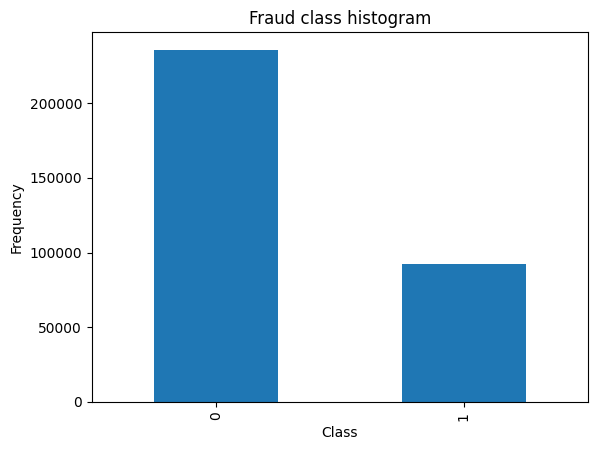

In [62]:
pd.value_counts(df_new['label']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df_new['label'].value_counts()

In [63]:
cols_x = [
    'protocol',
'flow_duration',
'tot_fwd_pkts',
'tot_bwd_pkts',
'totlen_fwd_pkts',
'totlen_bwd_pkts',
'fwd_pkt_len_mean',
'fwd_pkt_len_std',
'bwd_pkt_len_mean',
'flow_byts_s',
'flow_pkts_s',
'flow_iat_std',
'flow_iat_min',
'fwd_iat_tot',
'fwd_iat_min',
'bwd_iat_tot',
'bwd_iat_min',
'fwd_psh_flags',
'fwd_urg_flags',
'bwd_pkts_s',
'fin_flag_cnt',
'rst_flag_cnt',
'psh_flag_cnt',
'ack_flag_cnt',
'urg_flag_cnt',
'down_up_ratio',
'init_fwd_win_byts',
'init_bwd_win_byts',
'fwd_seg_size_min',
'active_mean',
'idle_mean'
]

In [64]:
X = np.array(df_new[cols_x])
y = np.array(df_new['label'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (328181, 31)
Shape of y: (328181,)


In [65]:
df_new

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_mean,flow_byts_s,...,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label
0,0,115307855,5,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,1812348.0,56700000.0,0
1,0,60997457,2,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,61000000.0,0
2,2,61149019,5,0,1500,0,300.0,0.000000,0.000000,24.530238,...,0,0,0,0,-1,-1,8,3530939.0,19200000.0,0
3,0,60997555,2,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,61000000.0,0
4,0,61997503,3,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,999909.0,61000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331095,0,118494070,31,0,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,-1,-1,0,0.0,0.0,0
331096,1,114340,2,1,0,0,0.0,0.000000,0.000000,0.000000,...,1,0,0,0,1024,0,20,0.0,0.0,0
331097,1,1404866,8,7,1132,1581,141.5,222.792023,225.857143,1931.145034,...,1,0,0,0,8192,62868,20,0.0,0.0,0
331098,1,3966663,14,7,1386,392,99.0,189.204814,56.000000,448.235708,...,1,0,0,0,8192,62652,20,0.0,0.0,0


In [66]:
df_new['label'].value_counts()

label
0    235778
1     92403
Name: count, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (262544, 31)
Number transactions y_train dataset:  (262544,)
Number transactions X_test dataset:  (65637, 31)
Number transactions y_test dataset:  (65637,)


In [69]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))


sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_t, y_t.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))


Before OverSampling, counts of label '0': 188720
Before OverSampling, counts of label '1': 73824
After OverSampling, the shape of train_X: (301944, 31)
After OverSampling, the shape of train_y: (301944,) 

After OverSampling, counts of label '0': 150972
After OverSampling, counts of label '1': 150972


In [70]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [71]:
xgb_model = xgb.XGBClassifier()

In [72]:
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

In [73]:
clf = GridSearchCV(xgb_model, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.616 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.616 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.618 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.618 total time=   1.6s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.617 total time=   1.6s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.618 total time=   2.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.616 total time=   2.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.616 total time=   2.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.618 total time=   2.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.617 to

/Users/karthiknamboori/Desktop/Hackathons/Vajra/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.633 total time=   4.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.631 total time=   5.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.619 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.641 total time=   1.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.643 total time=   1.7s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.637 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.621 total time=   4.8s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.621 total time=   4.9s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.648 total time=   4.9s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.651 total time=   4.2s
[CV 5/5] END learning_rate=0.01, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=5)

In [74]:
clf.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

In [75]:
y_pred = clf.predict(X_v)


In [ ]:
predicted_labels = LE.inverse_transform(y_pred)

In [31]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_v)
acc

0.75611799881925

In [32]:
y_test_pred = clf.predict(X_test)
acc = accuracy_score(y_test_pred, y_test)
acc

0.7506589271295153

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, y_test_pred)


array([[42019,  5039],
       [11327,  7252]])

In [35]:
y_t.size


210035

In [36]:
y_v.size

52509

In [37]:
y_test.size

65637

In [38]:
clf

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=5)

In [39]:
from joblib import dump, load


In [41]:
dump(clf, "infiltration_01-03-2018.joblib")

['infiltration_01-03-2018.joblib']

In [42]:
loaded_clf = load("bruteforce-web-xss_sql-injection_23-02-2018.joblib")

In [43]:
loaded_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
current_row = X_test[0]

In [45]:
current_row = current_row.reshape(1, -1)

In [46]:
prediction = loaded_clf.predict(current_row)
print(prediction)

[0]


In [47]:
mis = 0
for i in range(len(X_test)):

    current_row = X_test[i]
    current_row = current_row.reshape(1, -1)
    prediction = loaded_clf.predict(current_row)
    actual = y_test[i]
    if prediction[0] != actual :
        mis+=1
        print(i, prediction, actual)
print(mis)
    

1 [0] 1
3 [0] 1
8 [0] 1
13 [0] 1
15 [3] 1
16 [0] 1
17 [0] 1
22 [0] 1
23 [0] 1
27 [0] 1
29 [0] 1
33 [1] 0
38 [0] 1
39 [0] 1
44 [0] 1
45 [3] 0
46 [0] 1
48 [0] 1
49 [0] 1
61 [0] 1
66 [0] 1
75 [0] 1
81 [3] 0
86 [0] 1
91 [0] 1
95 [3] 0
100 [0] 1
105 [0] 1
106 [0] 1
111 [0] 1
113 [0] 1
116 [0] 1
117 [0] 1
122 [0] 1
126 [0] 1
127 [0] 1
129 [0] 1
131 [0] 1
132 [0] 1
133 [0] 1
136 [3] 0
140 [0] 1
148 [0] 1
162 [0] 1
163 [0] 1
167 [0] 1
168 [0] 1
169 [0] 1
183 [0] 1
184 [0] 1
185 [0] 1
191 [0] 1
192 [0] 1
193 [0] 1
194 [0] 1
198 [0] 1
201 [0] 1
202 [0] 1
206 [0] 1
208 [0] 1
212 [0] 1
215 [0] 1
218 [0] 1
221 [0] 1
222 [3] 0
223 [0] 1
225 [0] 1
228 [0] 1
234 [0] 1
236 [0] 1
241 [0] 1
243 [1] 0
244 [0] 1
246 [0] 1
250 [0] 1
258 [3] 0
259 [0] 1
260 [0] 1
261 [0] 1
262 [0] 1
264 [0] 1
276 [0] 1
280 [0] 1
283 [3] 0
284 [0] 1
287 [0] 1
292 [0] 1
299 [0] 1
300 [0] 1
302 [0] 1
304 [0] 1
310 [0] 1
315 [0] 1
327 [0] 1
330 [0] 1
331 [0] 1
332 [2] 1
333 [0] 1
336 [0] 1
337 [0] 1
339 [3] 1
343 [0] 1
344 [0] 1

In [48]:
print(mis)

19464


In [76]:
label_encodings = LE.classes_
print("Label Encodings:")
for label, encoding in zip(label_encodings, range(len(label_encodings))):
    print(f"{label}: {encoding}")

Label Encodings:
Benign: 0
Infilteration: 1
